In [65]:
import os
import requests
import numpy as np
import json

#해당url에 request하기 위한 함
def request_prediction(url, file_name, form, command, param):
    data = {'format' : form, 
           'command' : command,
           'parameter' : json.dumps(param)}
    
#     files = {'image' : open(file_name, 'rb'),
#             'json' : (None, json.dumps(data), 'application/json')}
    files = {'image' : open(file_name, 'rb')}
      
    
    
#     headers = {'Content-Type': 'multipart/form-data; charset=utf-8'}
    headers = {'Content-Type': 'multipart/form-data'}
    
    return requests.post(url, files=files, data=data)

In [62]:
# sample image
file_path = './images/samples'
url = 'http://localhost:5000/predict'

In [74]:
%%time
file_1 = os.path.join(file_path, 'sample (1).jpg')
form_1 = 'base64'
command_1 = 'skyline_detection'
param = {'color' : 'R'}

#request후 json파일에서 output_img인 key의 value 호출 (string으로 된 base64형태의 이미지)
test = request_prediction(url, file_1, form_1, command_1, param)
test
# test.json()

{'format': 'base64', 'command': 'skyline_detection', 'parameter': '{"color": "R"}'}
<class 'str'>
Wall time: 4.82 s


<Response [200]>

In [75]:
output_base64 = test.json()['result']['output_img']

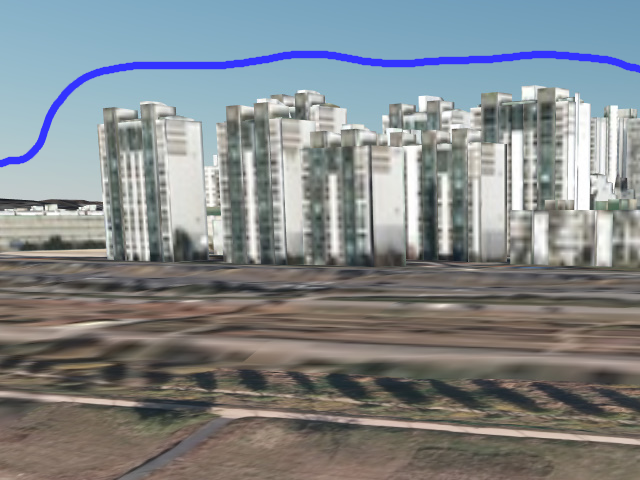

In [76]:
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

#base64 포맷 Python에서 호출한 경우
Image.open(BytesIO(base64.b64decode(output_base64.encode())))

In [80]:
%%time
file_1 = os.path.join(file_path, 'sample (1).jpg')
form_1 = 'base64'
command_1 = 'view_shielding_rate'

#request후 json파일에서 output_img인 key의 value 호출 (string으로 된 base64형태의 이미지)
test = request_prediction(url, file_1, form_1, command_1, param)
output_base64 = test.json()['result']['output_img']

{'format': 'base64', 'command': 'view_shielding_rate', 'parameter': '{"color": "R"}'}
<class 'str'>
Wall time: 4.83 s


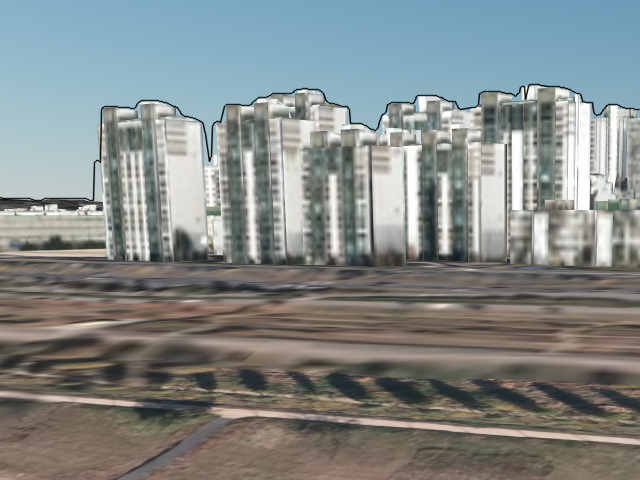

In [81]:
#base64 포맷 Python에서 호출한 경우
img = Image.open(BytesIO(base64.b64decode(output_base64.encode())))
img

In [56]:
test.json()['result']['shielding_rate']

75.8055

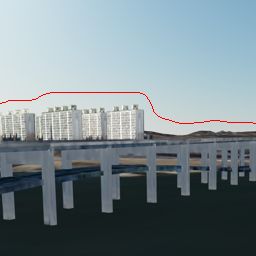

In [4]:
file = 'test2.jpg'
test = request_prediction(url, file)
array_to_img(test.json()['output_img'])

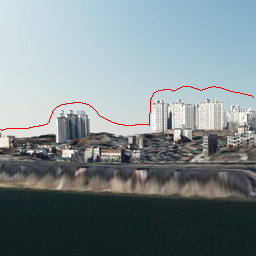

In [5]:
file = 'test3.jpg'
test = request_prediction(url, file)
array_to_img(test.json()['output_img'])

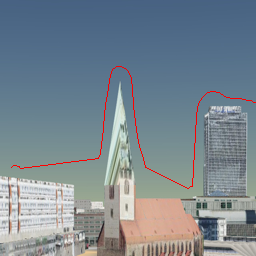

In [6]:
file = 'test4.jpg'
test = request_prediction(url, file)
array_to_img(test.json()['output_img'])

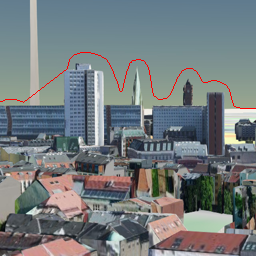

In [7]:
file = 'test5.jpg'
test = request_prediction(url, file)
array_to_img(test.json()['output_img'])

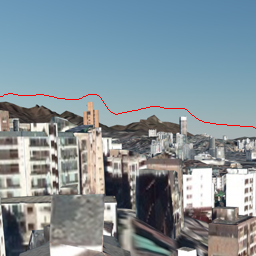

In [8]:
file = 'test6.jpg'
test = request_prediction(url, file)
array_to_img(test.json()['output_img'])

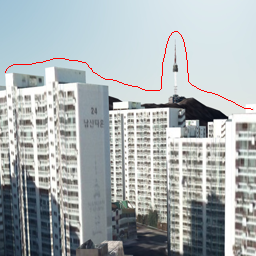

In [9]:
file = 'test7.jpg'
test = request_prediction(url, file)
array_to_img(test.json()['output_img'])